In [189]:
import pandas as pd
import codecs
import sys
import numpy as np
import matplotlib.pyplot as plt
import datetime
from mpl_toolkits.mplot3d import Axes3D
#F=codecs.open('xxx.csv','r','utf-8')
#f= codecs.open('部分数据/附件1/YD1.xlsx','r', 'utf8')

In [3]:
yd1 = pd.ExcelFile("../A题全部数据/附件1/YD1.xlsx")
yd2 = pd.ExcelFile("../A题全部数据/附件1/YD2.xlsx")
yd3 = pd.ExcelFile("../A题全部数据/附件1/YD3.xlsx")
yd4 = pd.ExcelFile("../A题全部数据/附件1/YD4.xlsx")
yd5 = pd.ExcelFile("../A题全部数据/附件1/YD5.xlsx")
yd6 = pd.ExcelFile("../A题全部数据/附件1/YD6.xlsx")
yd7 = pd.ExcelFile("../A题全部数据/附件1/YD7.xlsx")
yd8 = pd.ExcelFile("../A题全部数据/附件1/YD8.xlsx")
yd9 = pd.ExcelFile("../A题全部数据/附件1/YD9.xlsx")
yd10 = pd.ExcelFile("../A题全部数据/附件1/YD10.xlsx")
yd11 = pd.ExcelFile("../A题全部数据/附件1/YD11.xlsx")


In [4]:
yd3yd7 = pd.ExcelFile("../A题部分数据/附件3/设备组1-YD3+YD7.xlsx")
yd1yd2yd4 = pd.ExcelFile("../A题部分数据/附件3/设备组2-YD1+YD2+YD4.xlsx")
yd4yd5yd10yd11=pd.ExcelFile("../A题部分数据/附件3/设备组3-YD4+YD5+YD8+YD10+YD11.xlsx")

In [5]:
yd=[yd1,yd2,yd3,yd4,yd5,yd6,yd7,yd8,yd9,yd10, yd11, yd3yd7, yd1yd2yd4, yd4yd5yd10yd11]

In [6]:
##最终的数据。 equip_data设备数据， period_data 周波数据， harmonic_data 谐波数据。 
## 格式都是list。 index 0-10 代表单个设备1-11，11是YD3+YD7，12是YD1+YD2+YD4， 13是YD4+YD5+YD8+YD10+YD11。
## list 下面每个数据是dataframe 格式。



equip_data = []
period_data = []
harmonic_data = []
for i in range(0,14):
    equip_data.append(yd[i].parse('设备数据'));
    period_data.append(yd[i].parse('周波数据'));
    harmonic_data.append(yd[i].parse('谐波数据'));
    


In [7]:
len(equip_data)

14

In [8]:
equip_data[0].head()

time  IC    UC  PC  QC  PFC  P  Q   PF
0 2018-01-25 14:55:44   9  2222   3   0  184  3  0  184
1 2018-01-25 14:55:45   9  2223   3   0  150  3  0  150
2 2018-01-25 14:55:46   9  2224   2   0  139  2  0  139
3 2018-01-25 14:55:47   9  2224   3   0  160  3  0  160
4 2018-01-25 14:55:48   9  2223   3   0  142  3  0  142

In [9]:
colnames=list(equip_data[0])
colnames

['time', 'IC', 'UC', 'PC', 'QC', 'PFC', 'P', 'Q', 'PF']

In [10]:
colnames[1:]

['IC', 'UC', 'PC', 'QC', 'PFC', 'P', 'Q', 'PF']

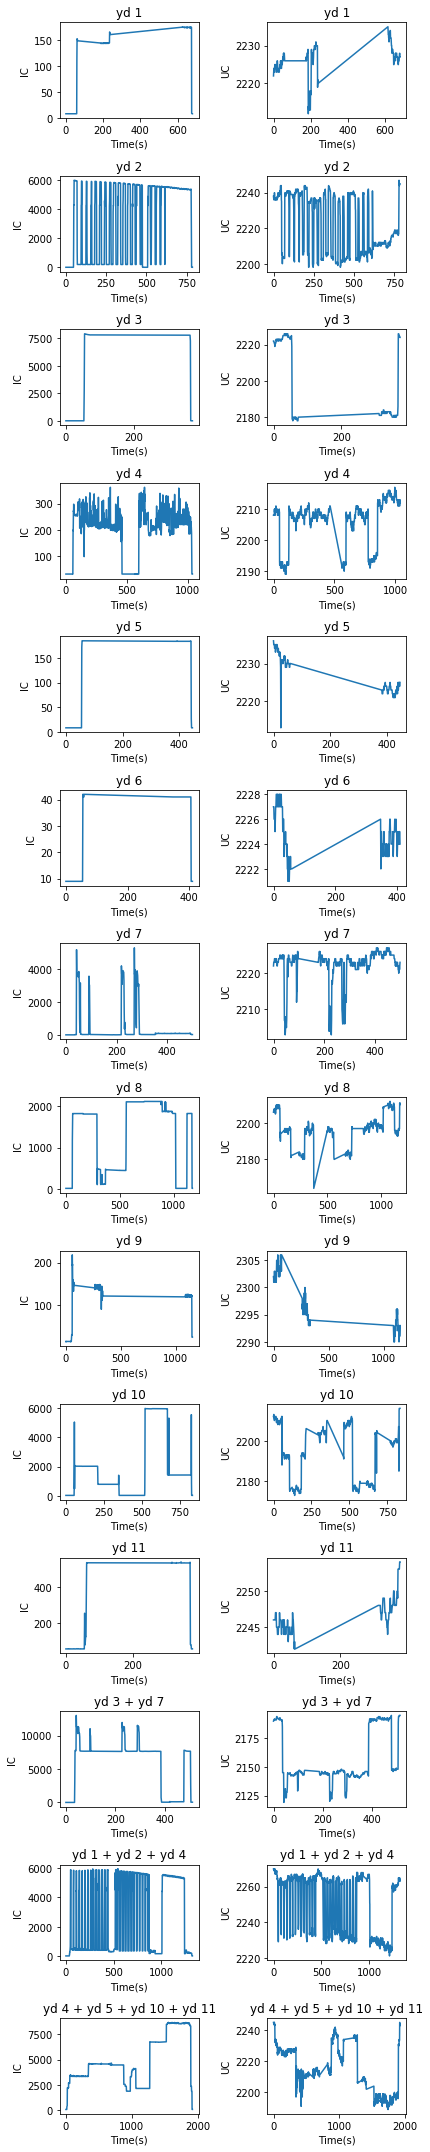

In [11]:
##各个设备的IC 与 UC 随着时间变化。

name = ['IC', 'UC']
fig = plt.figure(figsize=(6, 30))

num=1

for i in range(0,len(equip_data)):
    for c in name:
        ax = fig.add_subplot(len(equip_data),len(name),num)
        num = num+1
        x=[]
        for t in range(0, len(equip_data[i]['time'])):
            x.append((equip_data[i]['time'][t] - equip_data[i]['time'][0]).seconds)
        ax.plot(x,equip_data[i][c])
        plt.ylabel(c)
        plt.xlabel('Time(s)')
        if i==11:
            plt.title('yd 3 + yd 7')
        elif i==12:
            plt.title('yd 1 + yd 2 + yd 4')
        elif i==13:
            plt.title('yd 4 + yd 5 + yd 10 + yd 11')
        else:   
            plt.title('yd %d' %(i+1))
        

plt.tight_layout()
plt.show()

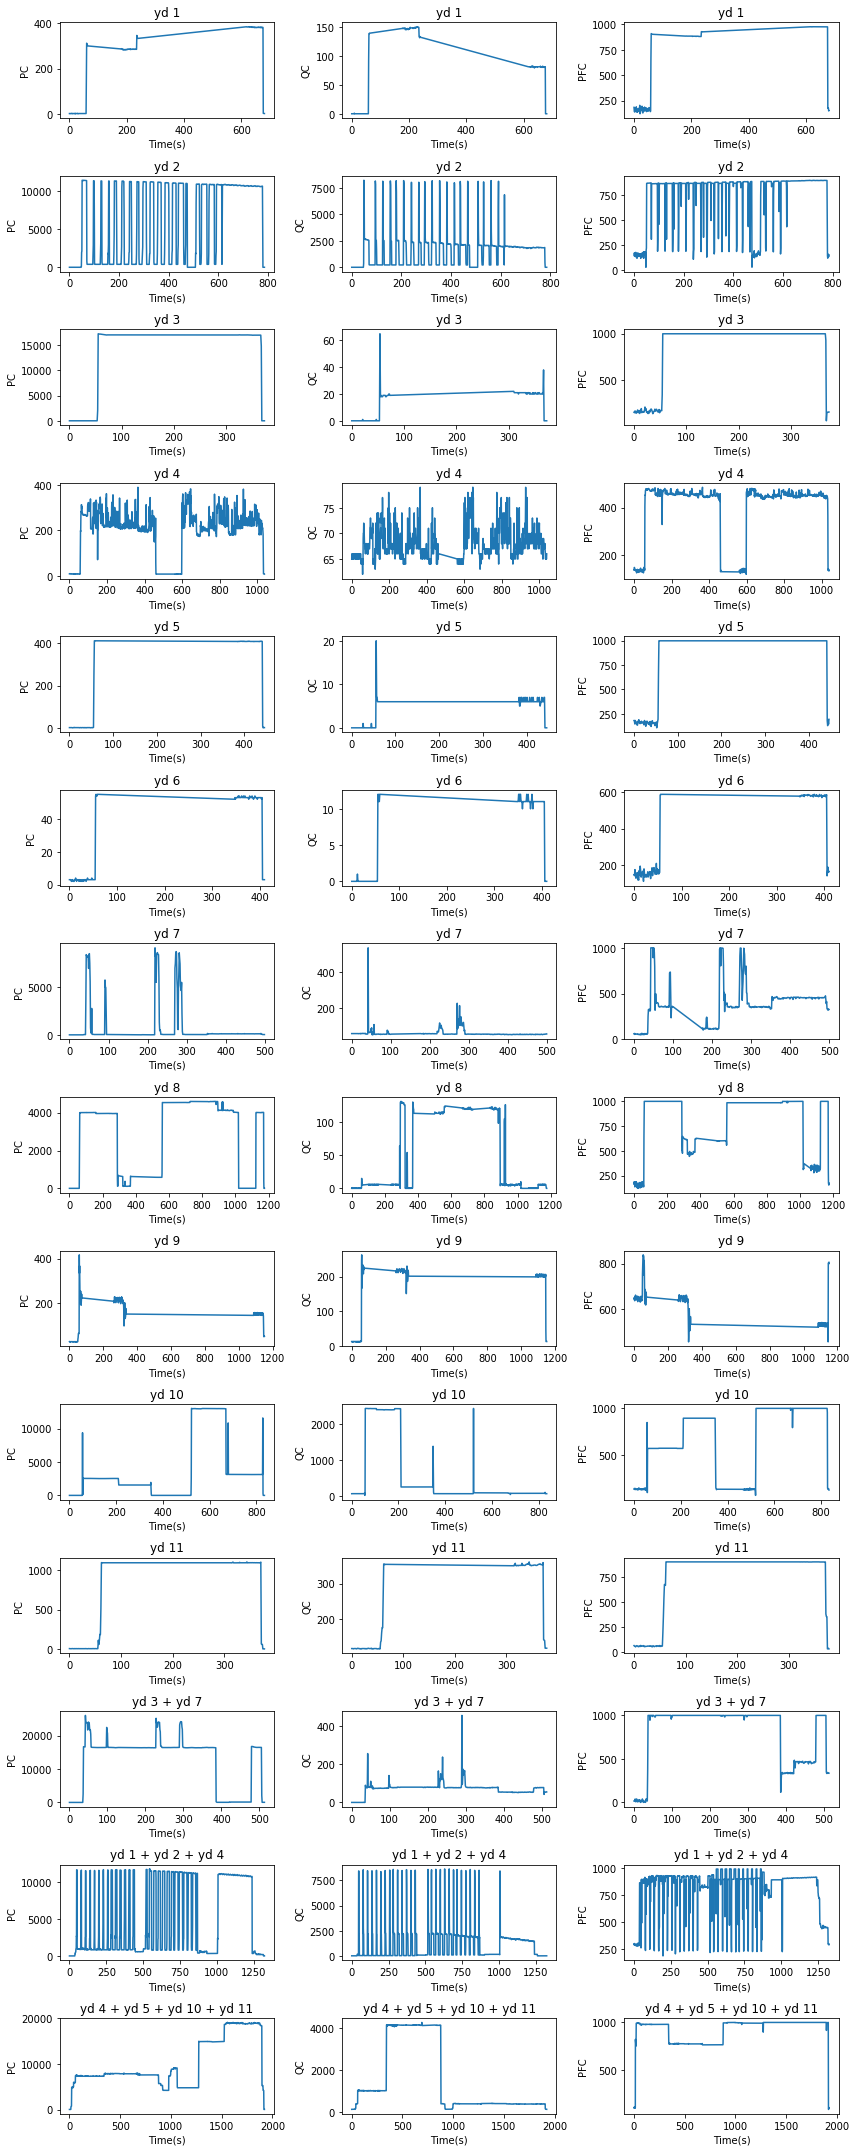

In [12]:
## 各个设备的PC， QC 和 PFC 随时间变化

name = ['PC', 'QC', 'PFC']
fig = plt.figure(figsize=(12, 30))

num=1

for i in range(0,len(equip_data)):
    for c in name:
        ax = fig.add_subplot(len(equip_data),len(name),num)
        num = num+1
        x=[]
        for t in range(0, len(equip_data[i]['time'])):
            x.append((equip_data[i]['time'][t] - equip_data[i]['time'][0]).seconds)
        ax.plot(x, equip_data[i][c])
        plt.ylabel(c)
        plt.xlabel('Time(s)')
        if i==11:
            plt.title('yd 3 + yd 7')
        elif i==12:
            plt.title('yd 1 + yd 2 + yd 4')
        elif i==13:
            plt.title('yd 4 + yd 5 + yd 10 + yd 11')
        else:   
            plt.title('yd %d' %(i+1))

plt.tight_layout()
plt.show()

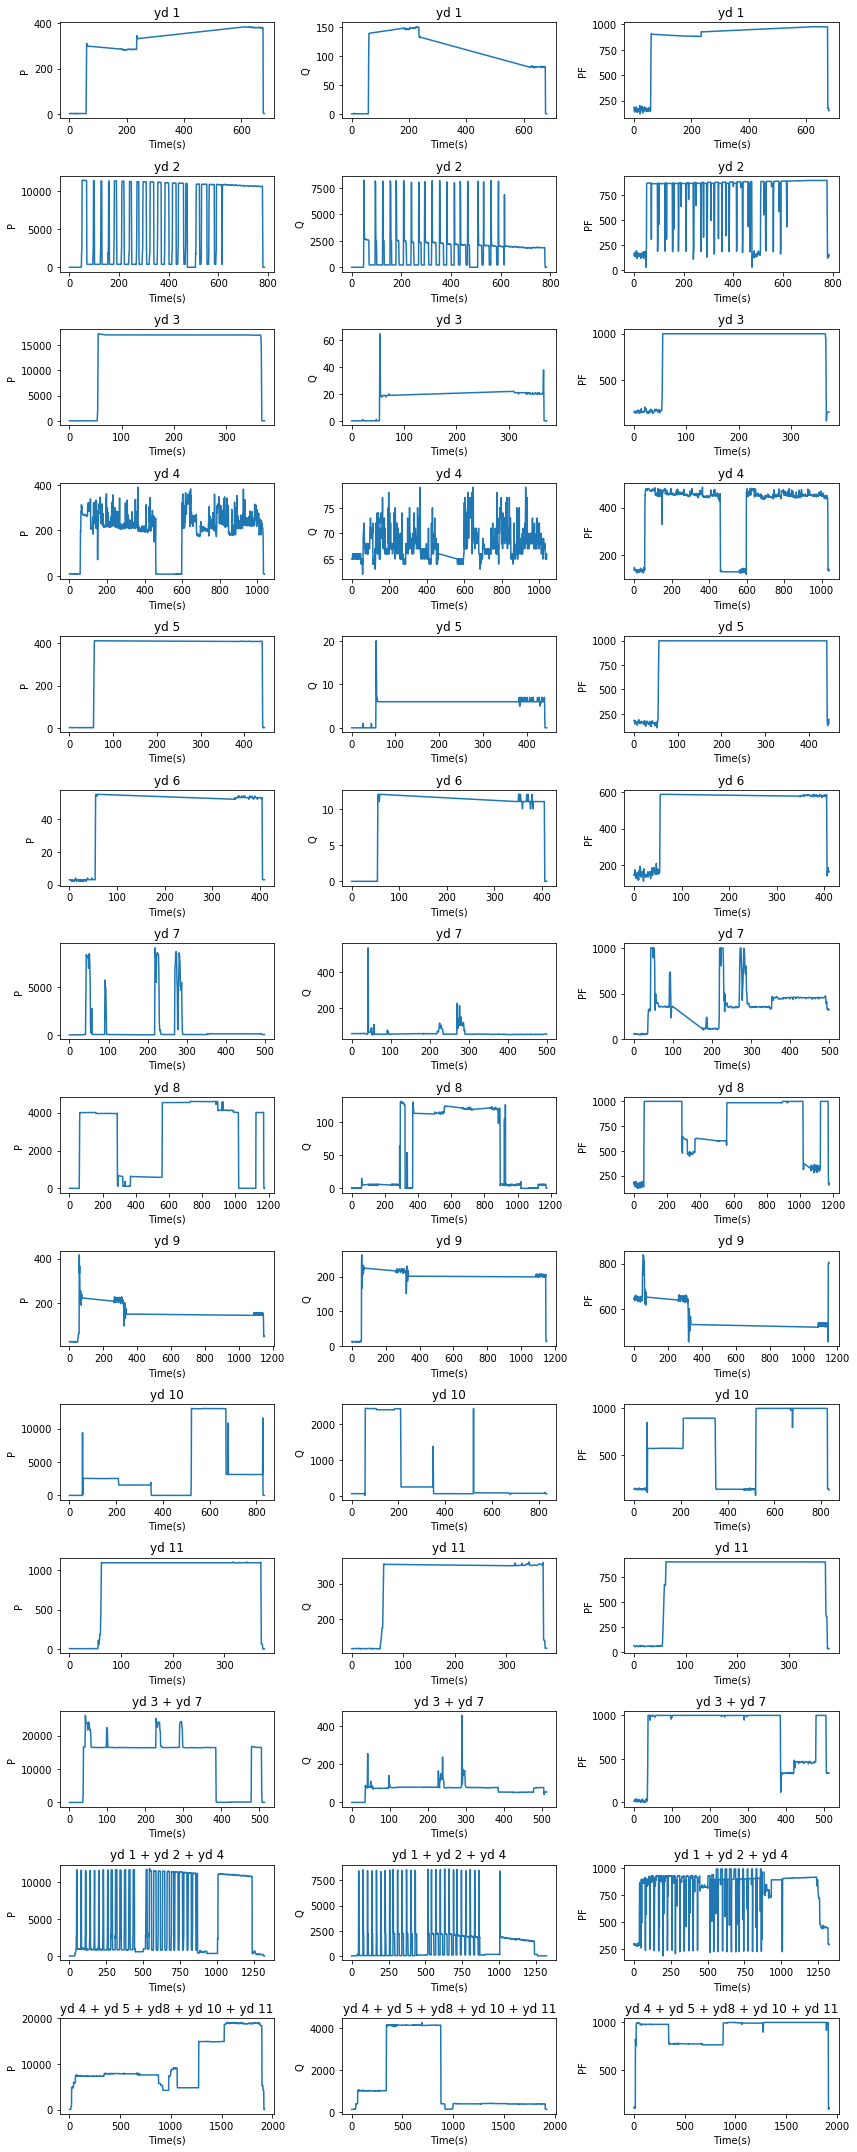

In [13]:
## 各个设备的P， Q 和 PF 随时间变化



name = ['P', 'Q', 'PF']
fig = plt.figure(figsize=(12, 30))

num=1

for i in range(0,len(equip_data)):
    for c in name:
        ax = fig.add_subplot(len(equip_data),len(name),num)
        num = num+1
        x=[]
        for t in range(0, len(equip_data[i]['time'])):
            x.append((equip_data[i]['time'][t] - equip_data[i]['time'][0]).seconds)
        ax.plot(x, equip_data[i][c])
        plt.ylabel(c)
        plt.xlabel('Time(s)')
        if i==11:
            plt.title('yd 3 + yd 7')
        elif i==12:
            plt.title('yd 1 + yd 2 + yd 4')
        elif i==13:
            plt.title('yd 4 + yd 5 + yd8 + yd 10 + yd 11')
        else:   
            plt.title('yd %d' %(i+1))

plt.tight_layout()
plt.show()

In [14]:
period_data[0].head()

time    IC001    IC002    IC003    IC004    IC005    IC006  \
0 2018-01-25 14:55:44  1666579      133      149      111       64       34   
1 2018-01-25 14:55:45  1666639       81  1666561  1666557  1666459  1666548   
2 2018-01-25 14:55:46  1666584  1666520  1666625       19       53  1666521   
3 2018-01-25 14:55:47      124      152       84       24      109       27   
4 2018-01-25 14:55:48  1666573      131       59  1666655       71  1666553   

     IC007    IC008    IC009   ...       UC119    UC120    UC121    UC122  \
0  1666650  1666624  1666550   ...     1622152  1618527  1613924  1603431   
1  1666638  1666550  1666480   ...       45832    40594    34290    21024   
2  1666535  1666641  1666525   ...      116243   115530   108853   102511   
3  1666481  1666598      106   ...      137244   138031   139219   139184   
4  1666485  1666645      183   ...      101440   103262   111804   113170   

     UC123    UC124    UC125    UC126    UC127    UC128  
0  1600470  1593617  1591364  1582627  1580816  1576276  
1    15188    10817     1403  1658520  1655265  1644926  
2   102151    95334    95012    87565    85110    76512  
3   139536   139506   139511   139590   138140   134726  
4   119161   124020   123130   127047   130473   133103  

[5 rows x 257 columns]

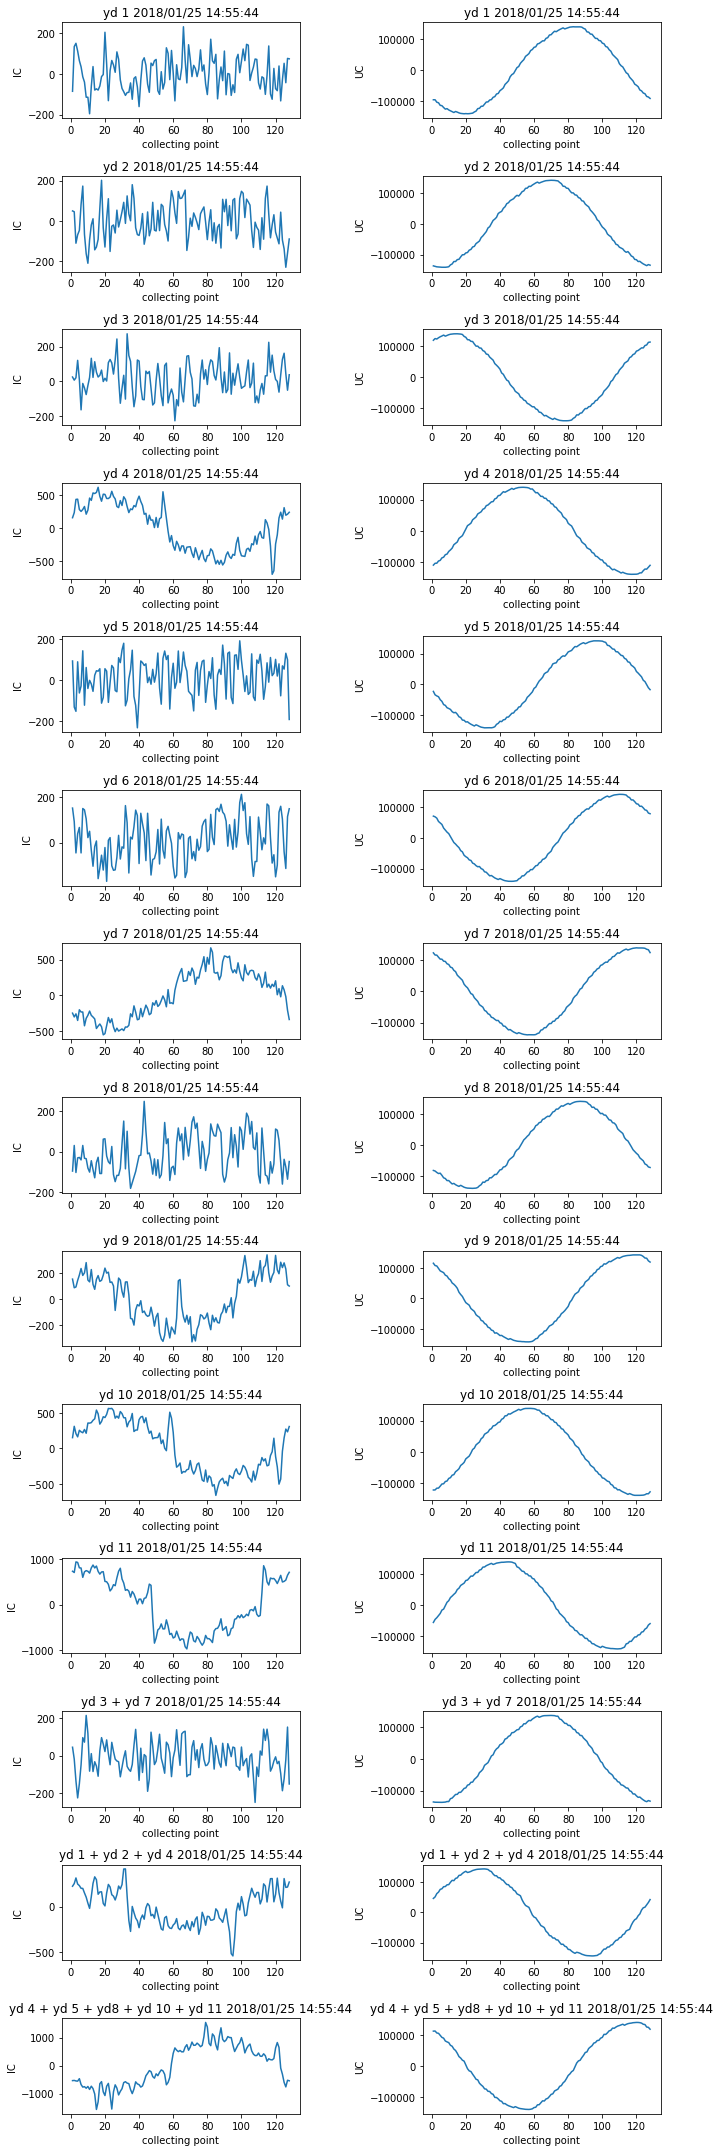

In [15]:
## IC 和 UC的周波数据，每个有128个数据采集点， 先看第一行 time=0;

fig = plt.figure(figsize=(10, 30))
x=range(1,129)
num=1
time=0
for i in range(0,len(period_data)):
    for c in [1, 129]:
        ax = fig.add_subplot(len(period_data),2,num)
        num = num+1
        tmp = period_data[i].iloc[time][c:c+128]
        for k in range(len(tmp)):
            if(tmp[k]>1000000):
                tmp[k]=tmp[k]-1666665
        ax.plot(x,tmp)
        plt.xlabel('collecting point')
        s = period_data[0].iloc[time][0].strftime('%Y/%m/%d %H:%M:%S')
        if c==1:
            plt.ylabel('IC')
        else:
            plt.ylabel('UC')

        if i==11:
            plt.title('yd 3 + yd 7 '+s)
        elif i==12:
            plt.title('yd 1 + yd 2 + yd 4 '+s)
        elif i==13:
            plt.title('yd 4 + yd 5 + yd8 + yd 10 + yd 11 '+s)
        else:   
            plt.title('yd %d ' %(i+1)+s)
plt.tight_layout()
plt.show()

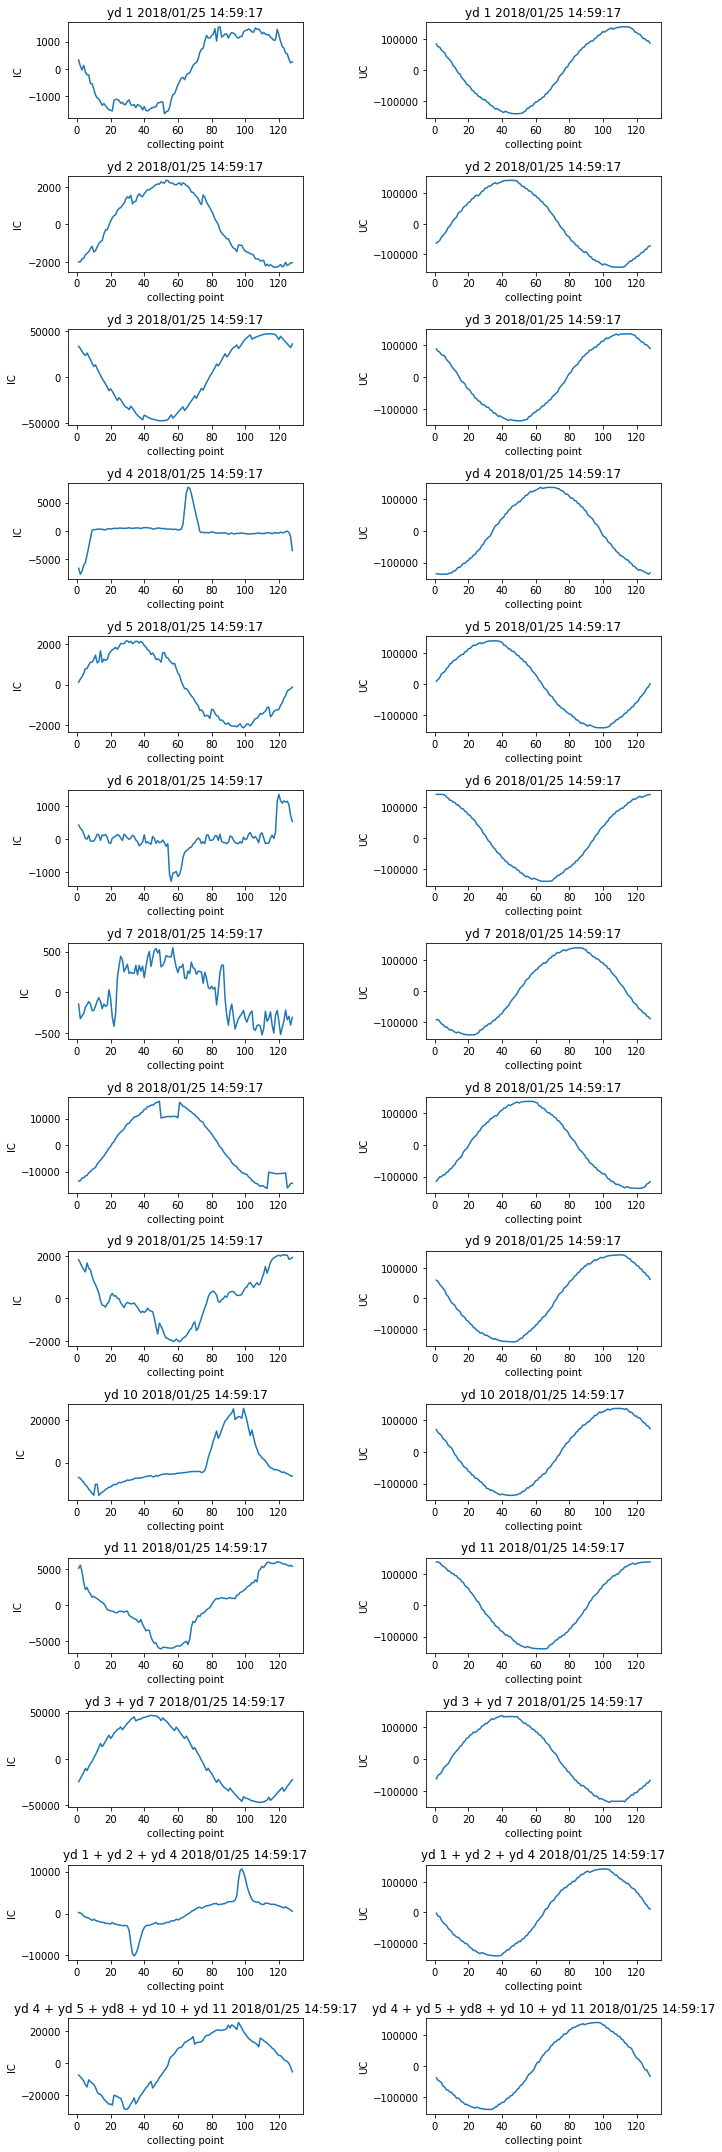

In [16]:
## IC 和 UC的周波，每个有128个数据采集点， 再看看100行的时候 time=100 （稳定的时候？）;



fig = plt.figure(figsize=(10, 30))
x=range(1,129)
num=1
time=100
for i in range(0,len(period_data)):
    for c in [1, 129]:
        ax = fig.add_subplot(len(period_data),2,num)
        num = num+1
        tmp = period_data[i].iloc[time][c:c+128]
        for k in range(len(tmp)):
            if(tmp[k]>1000000):
                tmp[k]=tmp[k]-1666665
        ax.plot(x,tmp)
        plt.xlabel('collecting point')
        s = period_data[0].iloc[time][0].strftime('%Y/%m/%d %H:%M:%S')
        if c==1:
            plt.ylabel('IC')
        else:
            plt.ylabel('UC')

        if i==11:
            plt.title('yd 3 + yd 7 '+s)
        elif i==12:
            plt.title('yd 1 + yd 2 + yd 4 '+s)
        elif i==13:
            plt.title('yd 4 + yd 5 + yd8 + yd 10 + yd 11 '+s)
        else:   
            plt.title('yd %d ' %(i+1)+s)
plt.tight_layout()
plt.show()

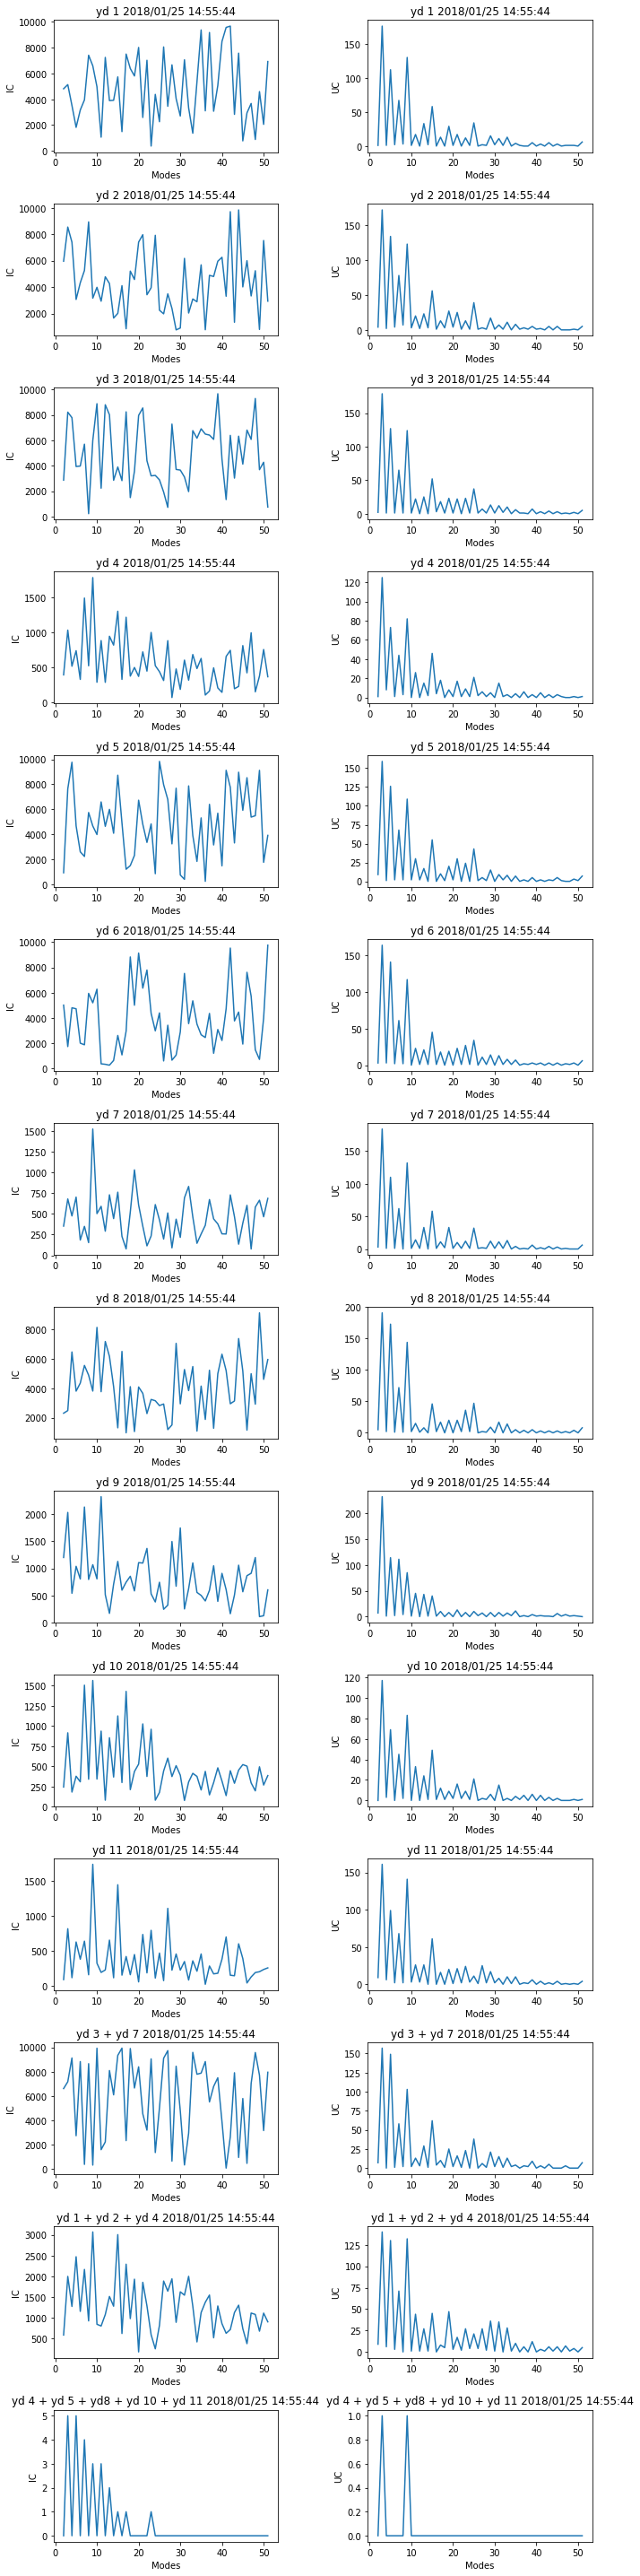

In [17]:
## IC 和 UC的谐波数据，每个都有2-51的modes，观察每个mode成分的大小， 先看看第一行的时候 time=0;



fig = plt.figure(figsize=(10, 40))
x=range(2,52)
num=1
time=0
for i in range(0,len(harmonic_data)):
    for c in [1, 51]:
        ax = fig.add_subplot(len(harmonic_data),2,num)
        num = num+1
        ax.plot(x,harmonic_data[i].iloc[time][c:c+50])
        plt.xlabel('Modes')
        if c==1:
            plt.ylabel('IC')
        else:
            plt.ylabel('UC')
        s = harmonic_data[0].iloc[time][0].strftime('%Y/%m/%d %H:%M:%S')
        if i==11:
            plt.title('yd 3 + yd 7 '+s)
        elif i==12:
            plt.title('yd 1 + yd 2 + yd 4 '+s)
        elif i==13:
            plt.title('yd 4 + yd 5 + yd8 + yd 10 + yd 11 '+s)
        else:   
            plt.title('yd %d ' %(i+1)+s)
plt.tight_layout()
plt.show()

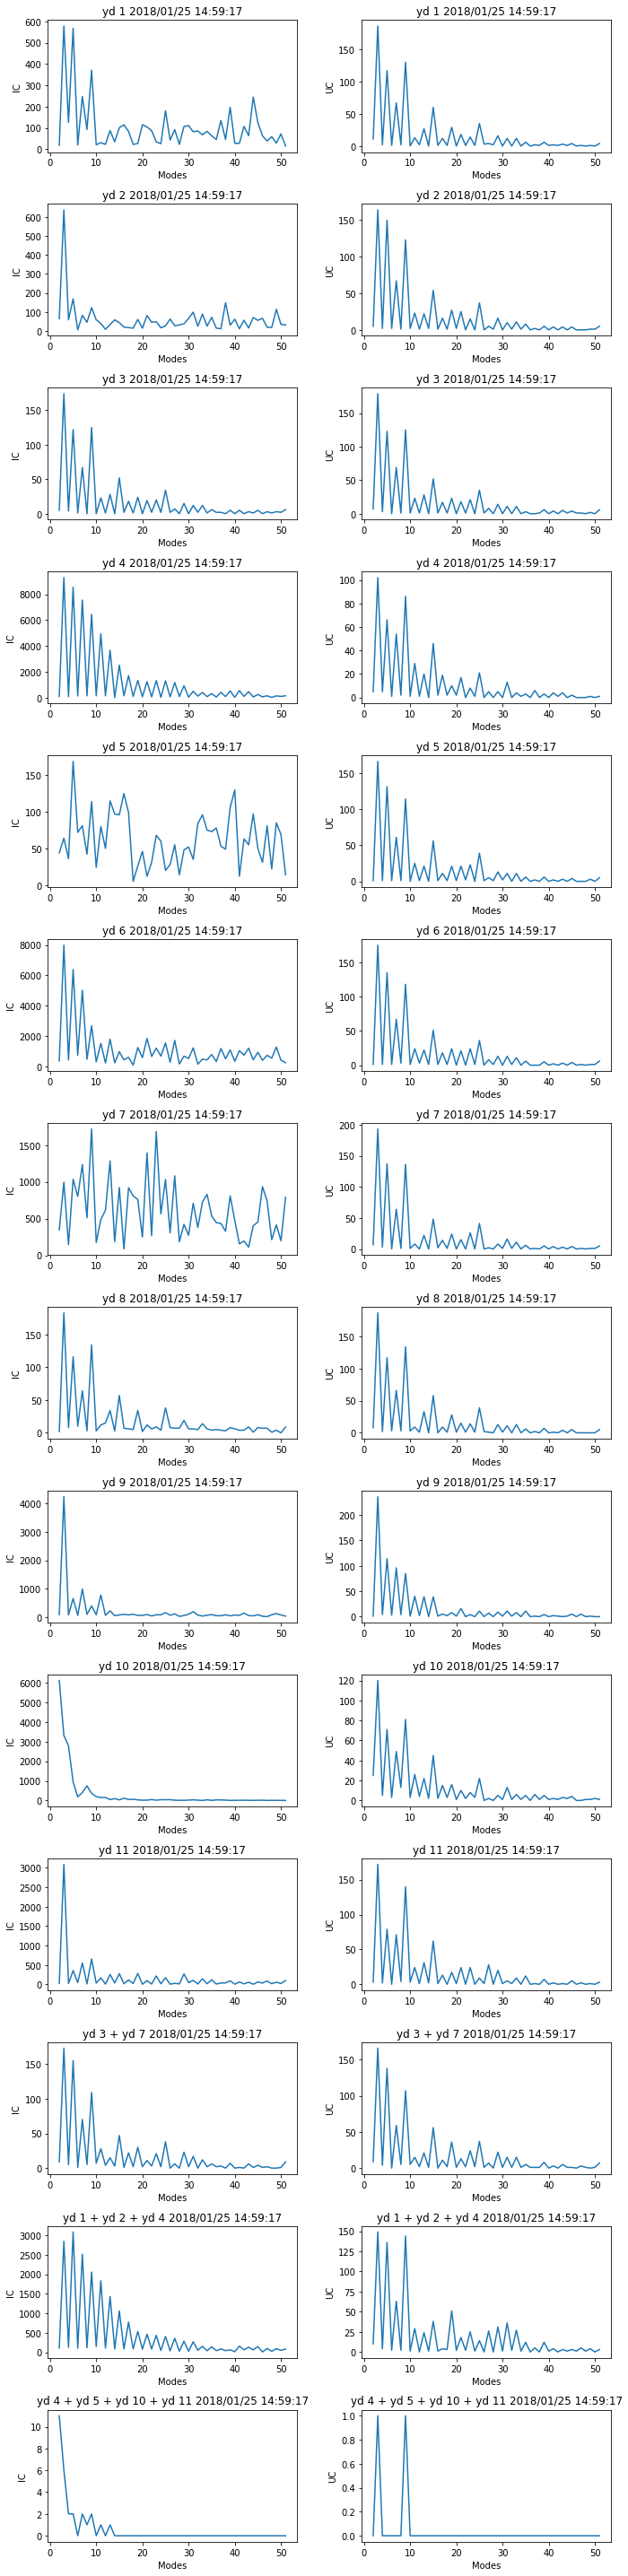

In [18]:
## IC 和 UC的谐波，每个都有2-51的modes，观察每个mode成分的大小， 先看看第100行的时候 time=100;




fig = plt.figure(figsize=(10, 40))
x=range(2,52)
num=1
time=100
for i in range(0,len(harmonic_data)):
    for c in [1, 51]:
        ax = fig.add_subplot(len(harmonic_data),2,num)
        num = num+1
        ax.plot(x,harmonic_data[i].iloc[time][c:c+50])
        plt.xlabel('Modes')
        if c==1:
            plt.ylabel('IC')
        else:
            plt.ylabel('UC')
        s = harmonic_data[0].iloc[time][0].strftime('%Y/%m/%d %H:%M:%S')
        if i==11:
            plt.title('yd 3 + yd 7 '+s)
        elif i==12:
            plt.title('yd 1 + yd 2 + yd 4 '+s)
        elif i==13:
            plt.title('yd 4 + yd 5 + yd 10 + yd 11 '+s)
        else:   
            plt.title('yd %d ' %(i+1)+s)
plt.tight_layout()
plt.show()

In [19]:
status_data = []
for i in range(0,11):
    status_data.append(yd[i].parse('操作记录'));

In [20]:
status_data[0].head()

序号                  时间   设备 工作状态   操作
0   1 2018-01-25 14:55:44  YD1   关闭  NaN
1   2 2018-01-25 14:56:43  YD1   1档   启动
2   3 2018-01-25 14:59:38  YD1   2档   切换
3   4 2018-01-25 15:03:31  YD1   3档   切换
4   5 2018-01-25 15:06:59  YD1   关闭   关闭

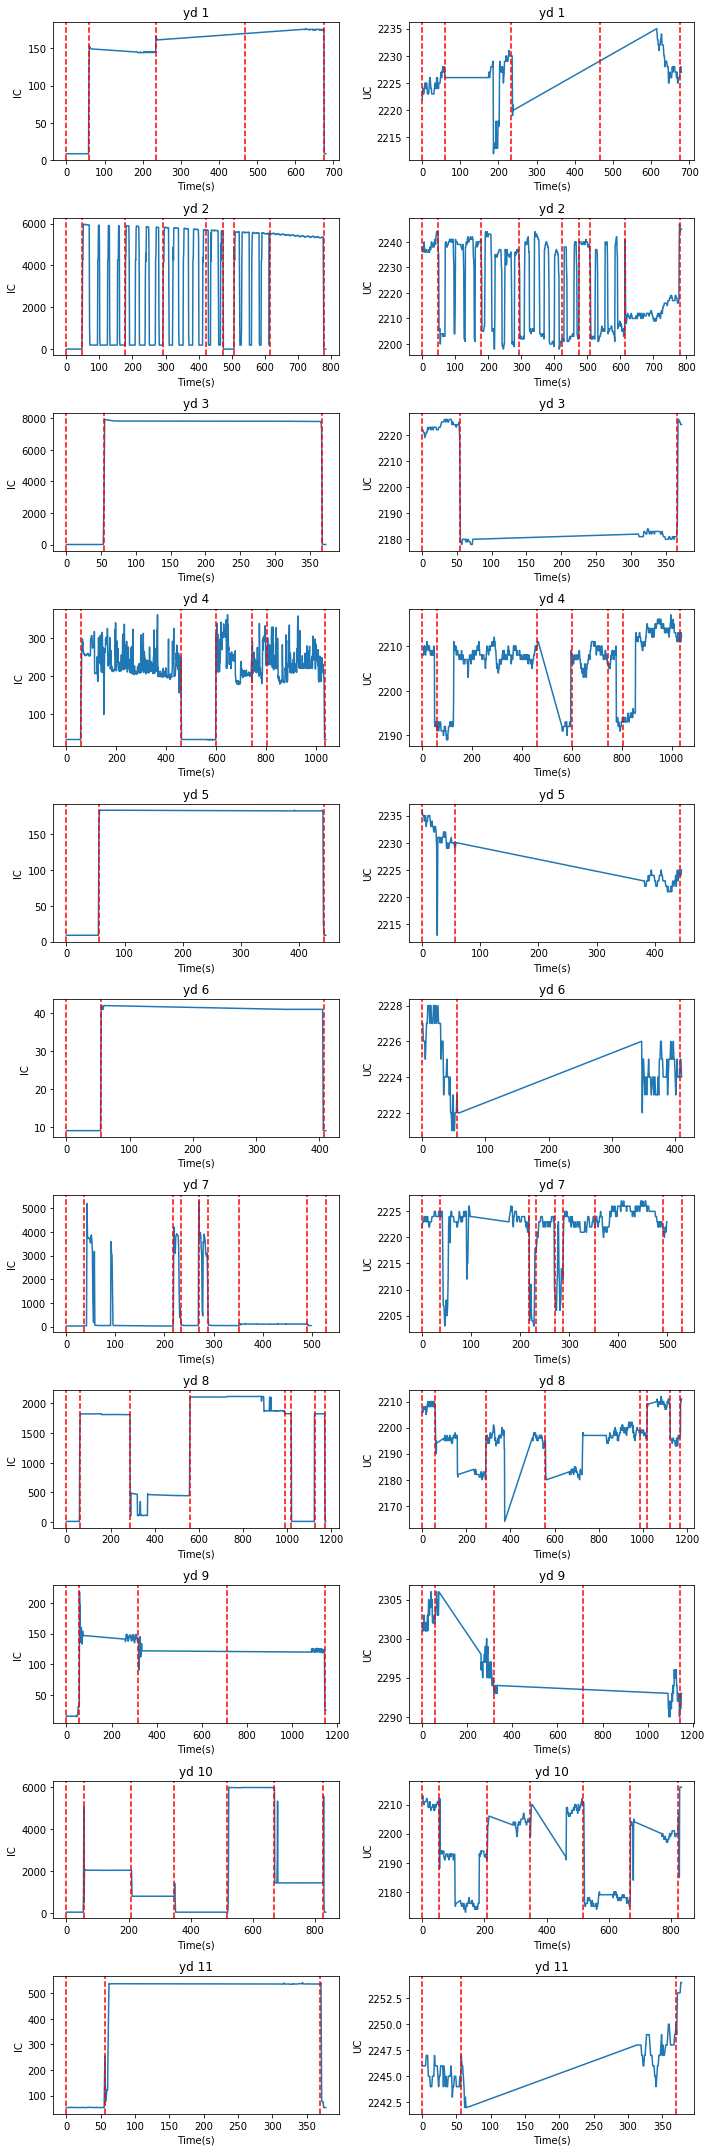

In [21]:
## IC and UC with different status.

name = ['IC', 'UC']
fig = plt.figure(figsize=(10, 30))

num=1

for i in range(0,len(equip_data[0:11])):
    x = []
    for t in range(0, len(equip_data[i]['time'])):
        x.append((equip_data[i]['time'][t] - equip_data[i]['time'][0]).seconds)
    for c in name:
        ax = fig.add_subplot(len(equip_data[0:11]),len(name),num)
        num = num+1
        ax.plot(x, equip_data[i][c])
        for k in range(0, len(status_data[i])):
            tmp = (status_data[i]['时间'][k] - equip_data[i]['time'][0]).seconds
            plt.axvline(tmp,linestyle='--', color='r')  
        plt.ylabel(c)
        plt.xlabel('Time(s)')
        plt.title('yd %d' %(i+1))
plt.tight_layout()
plt.show()

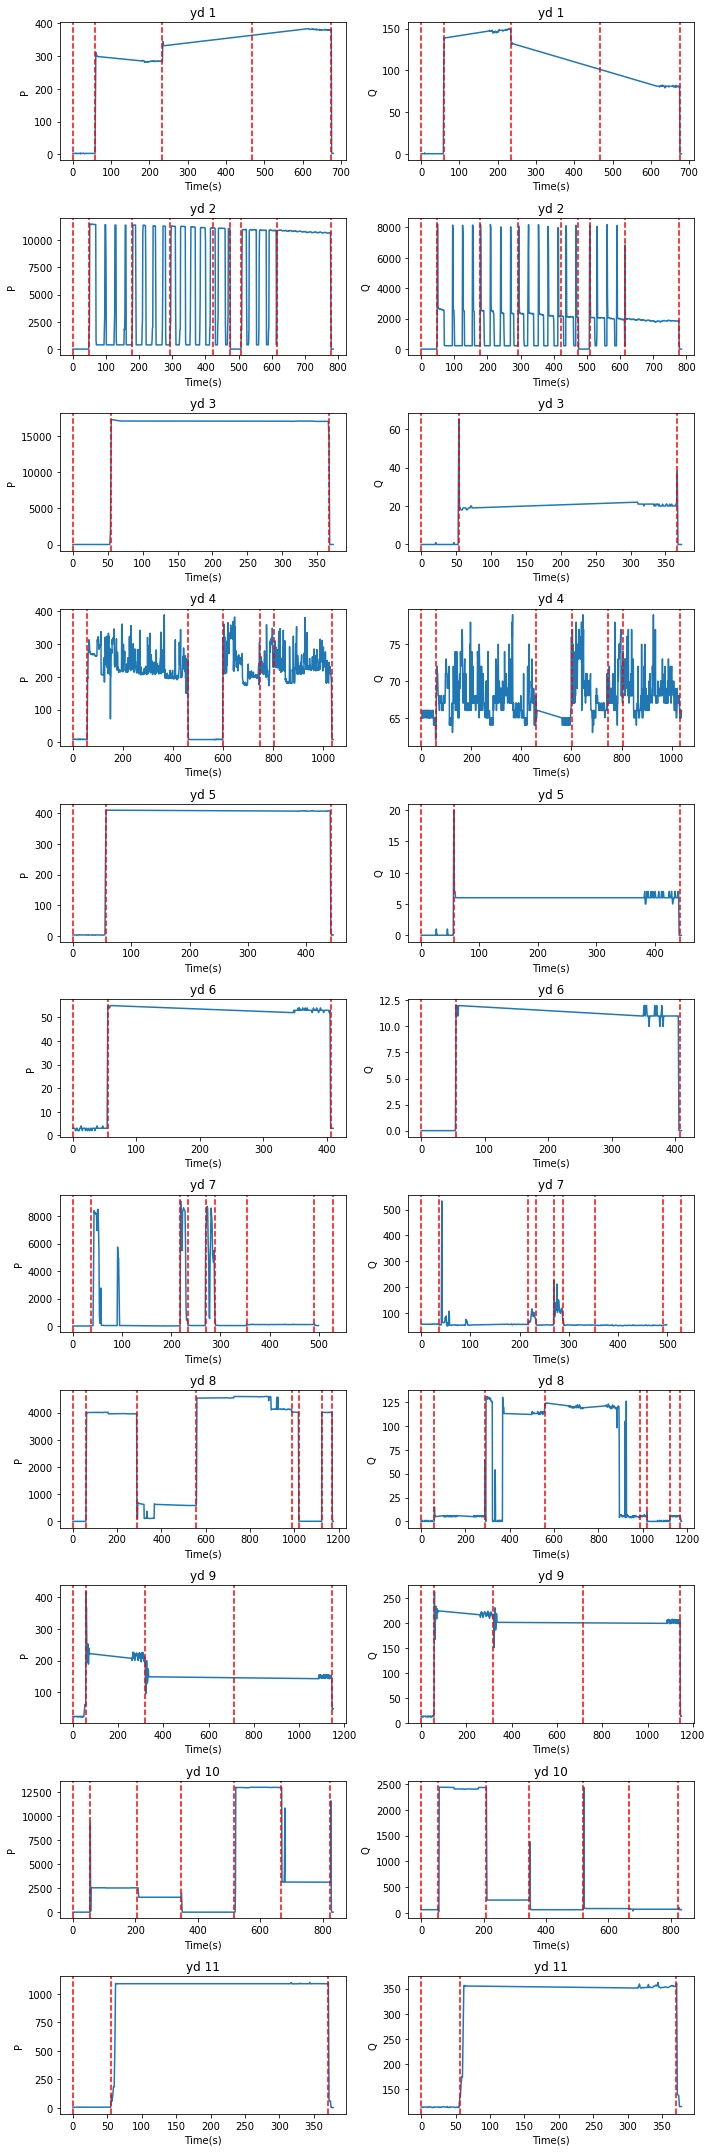

In [203]:
name = ['P', 'Q']
fig = plt.figure(figsize=(10, 30))

num=1

for i in range(0,len(equip_data[0:11])):
    x = []
    for t in range(0, len(equip_data[i]['time'])):
        x.append((equip_data[i]['time'][t] - equip_data[i]['time'][0]).seconds)
    for c in name:
        ax = fig.add_subplot(len(equip_data[0:11]),len(name),num)
        num = num+1
        ax.plot(x, equip_data[i][c])
        for k in range(0, len(status_data[i])):
            tmp = (status_data[i]['时间'][k] - equip_data[i]['time'][0]).seconds
            plt.axvline(tmp,linestyle='--', color='r')  
        plt.ylabel(c)
        plt.xlabel('Time(s)')
        plt.title('yd %d' %(i+1))
plt.tight_layout()
plt.show()

In [23]:
status_data[6]

序号                  时间   设备 工作状态   操作
0   1 2018-01-25 15:26:46  YD7   关闭  NaN
1   2 2018-01-25 15:27:22  YD7   打开   启动
2   3 2018-01-25 15:30:24  YD7   打印   切换
3   4 2018-01-25 15:30:39  YD7   结束   切换
4   5 2018-01-25 15:31:16  YD7   复印   切换
5   6 2018-01-25 15:31:34  YD7   结束   切换
6   7 2018-01-25 15:32:39  YD7   扫描   切换
7   8 2018-01-25 15:34:57  YD7   结束   切换
8   9 2018-01-25 15:35:35  YD7   关闭   关闭

In [24]:
from collections import defaultdict


map_IC = defaultdict(set)
map_IC_status = defaultdict(set)
for i in range(0, len(equip_data[0:11])):
    for j in range(0, len(status_data[i]['时间'])):
        if j == len(status_data[i]['时间'])-1:
            idx = equip_data[i]['time'] >= status_data[i]['时间'][j]
        else:
            idx = (equip_data[i]['time'] >= status_data[i]['时间'][j]) & (equip_data[i]['time'] < status_data[i]['时间'][j+1])
        s = status_data[i]['设备'][0] + ' ' + status_data[i]['工作状态'][j]
        status=list()
        tmp = equip_data[i][idx]['IC'].tolist()
        for k in range(0, len(tmp)):
            if k<len(tmp)-1 and abs(tmp[k+1]-tmp[k])/abs(tmp[k+1]+tmp[k]) > 0.1:
                continue
            if len(status)==0:
                status.append([tmp[k], 1])
            else:
                candidate = min(range(len(status)), key=lambda i: abs(status[i][0]-tmp[k]))
                if abs(tmp[k]-status[candidate][0])/((tmp[k]+status[candidate][0])/2.0) < 0.1:
                    status[candidate][0] = (status[candidate][0]*status[candidate][1]+tmp[k])/(status[candidate][1]+1)
                    status[candidate][1] = status[candidate][1]+1
                else:
                    status.append([tmp[k], 1])
        for m in status:
            if(m[1]<3): continue
            map_IC[m[0]].add(s)
            map_IC_status[s].add(m[0])

In [25]:
len(map_IC)

88

In [26]:
def test(IC_list):
    status_list = []
    for ic in IC_list:
        if ic!=9:
            status_list.append(map_IC.get(ic, map_IC[min(map_IC.keys(), key=lambda k: abs(k-ic))]))         
    #for st in range(0, len(status_list)):
    #    if st>1 and st < len(status_list)-1 and status_list[st]!= status_list[st-1] and status_list[st]!= status_list[st+1]:
    #        status_list[st] = status_list [st+1] 
    mp={}
    for st in status_list:
        for s in st:
            s=s[:(s.find(' '))]
            mp[s]=mp.get(s,0)+1
    
    equip = max(mp, key=mp.get)
    mp_equip_IC=defaultdict(set)
    mp_equip_status=defaultdict(set)
    for it in map_IC:
        for st in map_IC[it]:
            if(st.startswith(equip)):
                mp_equip_IC[it].add(st)
                mp_equip_status[st].add(it)
    ##return mp_equip_IC
                
    status_list = []
    if equip == 'YD2':
        while ic < len(IC_list):
            if IC_list[ic]<20:
                status_list.append('YD2 关闭')
                ic+=1
            elif 5000<IC_list[ic]<6000:
                start=ic
                ic+=1
                while ic < len(IC_list) and 5000<IC_list[ic]<6000:
                    ic+=1
                if 2<=ic-start<=5:
                    status_list.append('YD2 低火')
                elif 7<=ic-start<=11:
                    status_list.append('YD2 中低火')
                elif 13<=ic-start<=17:
                    status_list.append('YD2 中火')
                elif 20<=ic-start<=25:
                    status_list.append('YD2 中高火')
                elif ic-start>25:
                    status_list.append('YD2 高火')
            else:
                ic+=1
    else:
        pre_ic=IC_list[0]
        for ic in IC_list:
            if abs(ic-pre_ic)>20:
                pre_ic=ic
                continue
            pre_ic=ic
            tmp = mp_equip_IC.get(ic, mp_equip_IC[min(mp_equip_IC.keys(), key=lambda k: abs(k-ic))])
            value = min(mp_equip_IC.keys(), key=lambda k: abs(k-ic))
            pre = 10000000.0
            if len(status_list) > 0:
                for ic1 in mp_equip_status[str(status_list[-1])]:
                    pre = min(pre, abs(ic1-ic))
            if value < pre/1000:
                status_list.append(tmp)
            else:
                status_list.append(status_list[-1])
        
    for st in range(0, len(status_list)):
        if st>1 and st < len(status_list)-1 and status_list[st]!= status_list[st-1] and status_list[st]!= status_list[st+1]:
            status_list[st] = status_list [st-1]
            
    res = list()
    res.append(status_list[0])
    for st in range(1, len(status_list)):
        if status_list[st]!= status_list[st-1]:
            res.append(status_list[st])
    return res

In [27]:
for i in range(0,11):
    status_list=test(equip_data[i]['IC'].tolist())
    print(status_list)

[{'YD1 关闭'}, {'YD1 1档'}, {'YD1 2档'}, {'YD1 3档'}, {'YD1 关闭'}]
['YD2 关闭', 'YD2 低火', 'YD2 中低火', 'YD2 中火', 'YD2 关闭', 'YD2 中高火', 'YD2 关闭']
[{'YD3 关闭'}, {'YD3 打开'}, {'YD3 关闭'}]
[{'YD4 关闭'}, {'YD4 打开'}, {'YD4 重启'}, {'YD4 打开'}, {'YD4 重启'}, {'YD4 打开'}, {'YD4 重启'}, {'YD4 打开'}, {'YD4 关闭'}, {'YD4 睡眠'}, {'YD4 关闭'}, {'YD4 打开'}, {'YD4 重启'}, {'YD4 打开'}, {'YD4 重启'}, {'YD4 打开'}, {'YD4 重启'}, {'YD4 打开'}, {'YD4 重启'}, {'YD4 打开'}, {'YD4 关闭'}]
[{'YD5 关闭'}, {'YD5 打开'}, {'YD5 关闭'}]
[{'YD6 关闭'}, {'YD6 打开'}, {'YD6 关闭'}]
[{'YD7 关闭'}, {'YD7 打开'}, {'YD7 结束'}, {'YD7 打开'}, {'YD7 结束'}, {'YD7 打开'}, {'YD7 结束'}, {'YD7 打开'}, {'YD7 结束'}, {'YD7 打开'}, {'YD7 结束'}, {'YD7 打开'}, {'YD7 结束'}, {'YD7 打开'}, {'YD7 结束'}, {'YD7 打开'}, {'YD7 扫描'}, {'YD7 结束'}]
[{'YD8 保温', 'YD8 关闭'}, {'YD8 加热'}, {'YD8 制冷'}, {'YD8 加热、制冷'}, {'YD8 加热'}, {'YD8 保温', 'YD8 关闭'}, {'YD8 加热'}, {'YD8 保温', 'YD8 关闭'}]
[{'YD9 关闭'}, {'YD9 制冷'}, {'YD9 除湿'}, {'YD9 制冷'}, {'YD9 除湿'}, {'YD9 制冷'}, {'YD9 除湿'}, {'YD9 制冷'}, {'YD9 除湿'}, {'YD9 辅热'}, {'YD9 除湿'}, {'YD9 辅热'}, {'YD9 除湿'}

In [28]:
for i in range(0,11):
    print(status_data[i]['工作状态'].tolist())


['关闭', '1档', '2档', '3档', '关闭']
['关闭', '低火', '中低火', '中火', '中高火', '关闭', '中高火', '高火', '关闭']
['关闭', '打开', '关闭']
['关闭', '打开', '睡眠', '打开', '重启', '打开', '关闭']
['关闭', '打开', '关闭']
['关闭', '打开', '关闭']
['关闭', '打开', '打印', '结束', '复印', '结束', '扫描', '结束', '关闭']
['关闭', '加热', '制冷', '加热、制冷', '加热', '保温', '加热', '关闭']
['关闭', '制冷', '除湿', '辅热', '关闭']
['关闭', '1档热风', '1档冷风', '关闭', '2档热风', '2档冷风', '关闭']
['关闭', '打开', '关闭']


In [29]:
len(map_IC_status)

42

In [30]:
map_IC_status_diff=defaultdict(set)
map_IC_diff=defaultdict(set)
for st in map_IC_status:
    for st1 in map_IC_status:
        if st==st1:
            continue
        if st[:(st.find(' '))]!=st1[:(st1.find(' '))]:
            continue
        for i in map_IC_status[st]:
            for j in map_IC_status[st1]:
                map_IC_status_diff[st+' '+st1].add(j-i)
                map_IC_status_diff[st1+' '+st].add(i-j)
                map_IC_diff[j-i].add(st+' '+st1)
                map_IC_diff[i-j].add(st1+' '+st)

In [31]:
len(map_IC_diff)

893

In [32]:
def test_comb(IC_list):
    status_list = []
    ic=0
    while ic < len(IC_list)-1: 
        while ic < len(IC_list)-1 and abs(IC_list[ic+1]-IC_list[ic]) < 30:
            ic+=1
        
        start = ic
        while ic < len(IC_list)-1 and abs(IC_list[ic+1]-IC_list[ic]) >= 30:
            ic+=1
        diff = IC_list[ic] - IC_list[start]
        ic+=1
        status_list.append(map_IC_diff.get(diff, map_IC_diff[min(map_IC_diff.keys(), key=lambda k: abs(k-diff))]))
    ##for st in range(0, len(status_list)):
    ##    if st>1 and st < len(status_list)-1 and status_list[st]!= status_list[st-1] and status_list[st]!= status_list[st+1]:
    ##        status_list[st] = status_list [st+1] 
    
    mp={}
    for st in status_list:
        for s in st:
            mp[s[:(s.find(' '))]]=mp.get(s[:(s.find(' '))],0)+1
            ##s=s[(s.find(' '))+1:]
            ##s=s[(s.find(' '))+1:]
            ##mp[s[:(s.find(' '))]]=mp.get(s[:(s.find(' '))],0)+1
    return mp

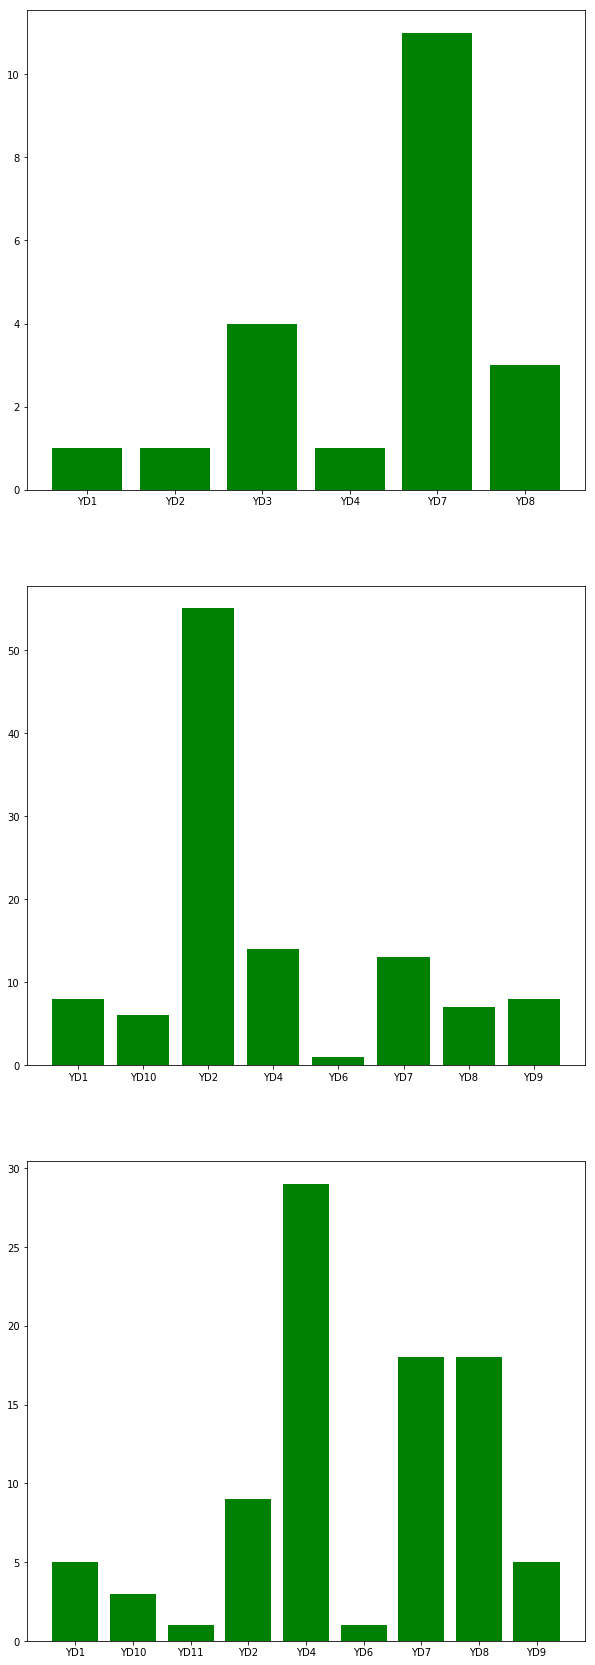

In [33]:
fig = plt.figure(figsize=(10, 30))
for i in range(11,14):
    status_list=test_comb(equip_data[i]['IC'].tolist())
    ax = fig.add_subplot(3,1,i-10)
    plt.bar(status_list.keys(), status_list.values(), color='g')
plt.show()


In [34]:
yd_unknown1 = pd.ExcelFile("../A题全部数据/附件2/设备1.xlsx")
yd_unknown2 = pd.ExcelFile("../A题全部数据/附件2/设备2.xlsx")
yd_unknown_mix1 = pd.ExcelFile("../A题全部数据/附件4/设备组1.xlsx")
yd_unknown_mix2 = pd.ExcelFile("../A题全部数据/附件4/设备组2.xlsx")
yd_unknown_mix3 = pd.ExcelFile("../A题全部数据/附件4/设备组3.xlsx")
yd_mix28 = pd.ExcelFile("../A题全部数据/附件3（不含操作记录）/设备组4-YD2+YD8.xlsx")
yd_mix3511 = pd.ExcelFile("../A题全部数据/附件3（不含操作记录）/设备组5-YD3+YD5+YD11.xlsx")
yd_mix12367 = pd.ExcelFile("../A题全部数据/附件3（不含操作记录）/设备组6-YD1+YD2+YD3+YD6+YD7.xlsx")

In [35]:
equip_data_unknown1=yd_unknown1.parse('设备数据');
equip_data_unknown2=yd_unknown2.parse('设备数据');
equip_data_unknown_mix1=yd_unknown_mix1.parse('设备数据');
equip_data_unknown_mix2=yd_unknown_mix2.parse('设备数据');
equip_data_unknown_mix3=yd_unknown_mix3.parse('设备数据');
equip_data28 =yd_mix28.parse('设备数据');
equip_data3511 = yd_mix3511.parse('设备数据');
equip_data12367 =yd_mix12367.parse('设备数据');

In [36]:
status_list=test(equip_data_unknown1['IC'].tolist())
status_list

[{'YD8 保温', 'YD8 关闭'},
 {'YD8 保温'},
 {'YD8 加热、制冷'},
 {'YD8 加热'},
 {'YD8 保温', 'YD8 关闭'}]

In [37]:
status_list=test(equip_data_unknown2['IC'].tolist())
status_list

[{'YD9 关闭'},
 {'YD9 除湿'},
 {'YD9 制冷'},
 {'YD9 除湿'},
 {'YD9 制冷'},
 {'YD9 除湿'},
 {'YD9 制冷'},
 {'YD9 除湿'},
 {'YD9 制冷'},
 {'YD9 除湿'},
 {'YD9 制冷'},
 {'YD9 除湿'},
 {'YD9 制冷'},
 {'YD9 除湿'},
 {'YD9 辅热'},
 {'YD9 除湿'},
 {'YD9 辅热'},
 {'YD9 关闭'}]

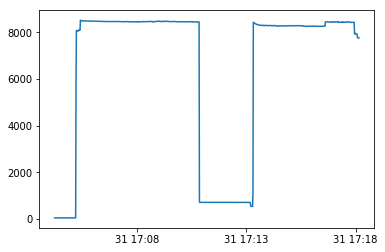

In [67]:
plt.plot(equip_data3511['time'],equip_data3511['IC'])

<Container object of 4 artists>

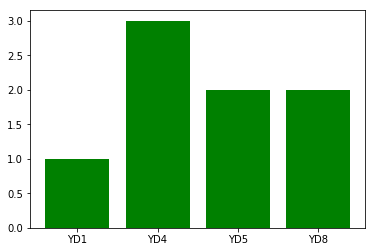

In [39]:
status_list=test_comb(equip_data_unknown_mix1['IC'].tolist())
plt.bar(status_list.keys(), status_list.values(), color='g')

<Container object of 9 artists>

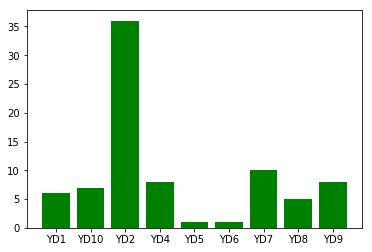

In [40]:
status_list=test_comb(equip_data_unknown_mix2['IC'].tolist())
plt.bar(status_list.keys(), status_list.values(), color='g')

<Container object of 11 artists>

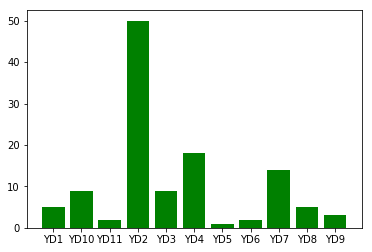

In [41]:
status_list=test_comb(equip_data_unknown_mix3['IC'].tolist())
plt.bar(status_list.keys(), status_list.values(), color='g')

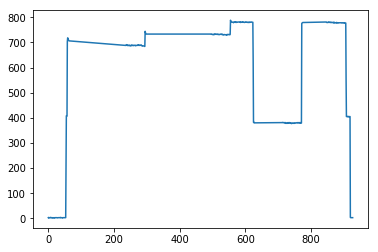

In [68]:
x=[]
for t in range(0, len(equip_data_unknown_mix1['time'])):
    x.append((equip_data_unknown_mix1['time'][t] - equip_data_unknown_mix1['time'][0]).seconds)
plt.plot(x, equip_data_unknown_mix1['P'])

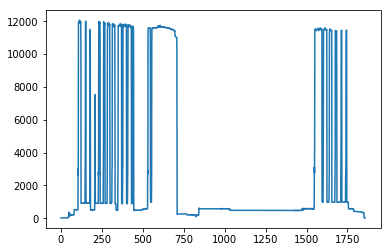

In [204]:

import mpld3
mpld3.enable_notebook()
x=[]
for t in range(0, len(equip_data_unknown_mix2['time'])):
    x.append((equip_data_unknown_mix2['time'][t] - equip_data_unknown_mix2['time'][0]).seconds)
plt.plot(x, equip_data_unknown_mix2['P'])


In [207]:
status_data[1]

序号                  时间   设备 工作状态   操作
0   1 2018-01-26 11:39:15  YD2   关闭  NaN
1   2 2018-01-26 11:40:03  YD2   低火   启动
2   3 2018-01-26 11:42:13  YD2  中低火   切换
3   4 2018-01-26 11:44:08  YD2   中火   切换
4   5 2018-01-26 11:46:17  YD2  中高火   切换
5   6 2018-01-26 11:47:09  YD2   关闭   关闭
6   7 2018-01-26 11:47:43  YD2  中高火   切换
7   8 2018-01-26 11:49:30  YD2   高火   切换
8   9 2018-01-26 11:52:14  YD2   关闭   关闭

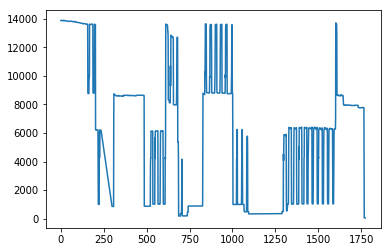

In [44]:
x=[]
for t in range(0, len(equip_data_unknown_mix3['time'])):
    x.append((equip_data_unknown_mix3['time'][t] - equip_data_unknown_mix3['time'][0]).seconds)
plt.plot(x, equip_data_unknown_mix3['IC'])

In [45]:
from collections import defaultdict


map_PC = defaultdict(set)
map_PC_status = defaultdict(set)
for i in range(0, len(equip_data[0:11])):
    for j in range(0, len(status_data[i]['时间'])):
        if j == len(status_data[i]['时间'])-1:
            idx = equip_data[i]['time'] >= status_data[i]['时间'][j]
        else:
            idx = (equip_data[i]['time'] >= status_data[i]['时间'][j]) & (equip_data[i]['time'] < status_data[i]['时间'][j+1])
        s = status_data[i]['设备'][0] + ' ' + status_data[i]['工作状态'][j]
        status=list()
        tmp = equip_data[i][idx]['IC'].tolist()
        for k in range(0, len(tmp)):
            flag=0
            for m in range(0, len(status)):
                if abs(tmp[k]-status[m][0])/min(tmp[k],status[m][0]) < 0.1:
                    status[m][0] = (status[m][0]*status[m][1]+tmp[k])/(status[m][1]+1)
                    status[m][1] = status[m][1]+1
                    flag=1
                    break
            if flag==0:
                status.append([tmp[k], 1]) 
        for m in status:
            if(m[1]<5): continue
            map_IC[m[0]].add(s)
            map_IC_status[s].add(m[0])

<Container object of 7 artists>

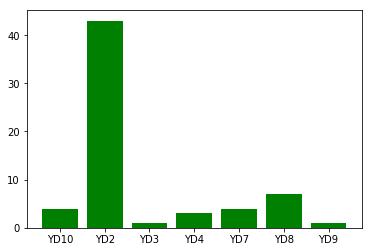

In [46]:
status_list=test_comb(equip_data28['IC'].tolist())
plt.bar(status_list.keys(), status_list.values(), color='g')

<Container object of 7 artists>

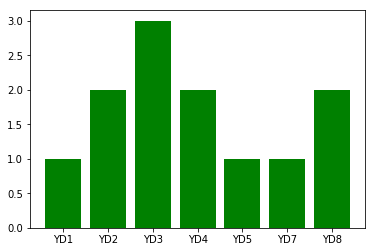

In [47]:
status_list=test_comb(equip_data3511['IC'].tolist())
plt.bar(status_list.keys(), status_list.values(), color='g')

<Container object of 9 artists>

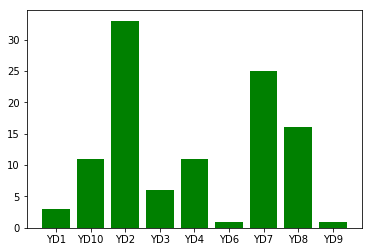

In [49]:
status_list=test_comb(equip_data12367['IC'].tolist())
plt.bar(status_list.keys(), status_list.values(), color='g')

In [52]:
map_P={}
map_Q={}
for i in range(0, len(equip_data[0:11])):
    for j in range(0, len(status_data[i]['时间'])):
        if j == len(status_data[i]['时间'])-1:
            idx = equip_data[i]['time'] >= status_data[i]['时间'][j]
        else:
            idx = (equip_data[i]['time'] >= status_data[i]['时间'][j]) & (equip_data[i]['time'] < status_data[i]['时间'][j+1])
        s = status_data[i]['设备'][0] + ' ' + status_data[i]['工作状态'][j]
        status=list()
        tmp = equip_data[i][idx]['P'].tolist()
        if len(tmp)==0:
            continue
        map_P[s]=sum(tmp)/float(len(tmp))
        tmp = equip_data[i][idx]['Q'].tolist()
        map_Q[s]=sum(tmp)/float(len(tmp))

In [55]:
map_P

{'YD1 1档': 283.66129032258067,
 'YD1 2档': 327.8333333333333,
 'YD1 3档': 381.08620689655174,
 'YD1 关闭': 78.6,
 'YD10 1档冷风': 1611.1515151515152,
 'YD10 1档热风': 2550.791044776119,
 'YD10 2档冷风': 3681.342857142857,
 'YD10 2档热风': 12404.935185185184,
 'YD10 关闭': 1944.090909090909,
 'YD11 关闭': 265.6666666666667,
 'YD11 打开': 1005.640625,
 'YD2 中低火': 3939.5652173913045,
 'YD2 中火': 6142.4453125,
 'YD2 中高火': 8325.084112149532,
 'YD2 低火': 3042.653846153846,
 'YD2 关闭': 2.857142857142857,
 'YD2 高火': 10675.109756097561,
 'YD3 关闭': 2121.0,
 'YD3 打开': 16845.72,
 'YD4 关闭': 9.833333333333334,
 'YD4 打开': 233.96035242290748,
 'YD4 睡眠': 27.130434782608695,
 'YD4 重启': 242.5084745762712,
 'YD5 关闭': 3.0,
 'YD5 打开': 398.84615384615387,
 'YD6 关闭': 3.0,
 'YD6 打开': 52.359375,
 'YD7 关闭': 3.1666666666666665,
 'YD7 复印': 5875.294117647059,
 'YD7 打印': 5819.0,
 'YD7 打开': 1043.981308411215,
 'YD7 扫描': 111.75735294117646,
 'YD7 结束': 48.0,
 'YD8 保温': 31.123076923076923,
 'YD8 关闭': 740.1666666666666,
 'YD8 制冷': 473.0909090909

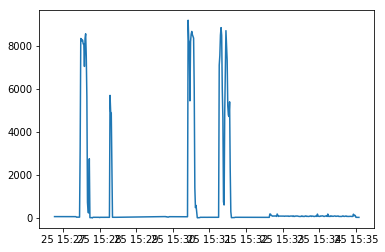

In [65]:
import math
plt.plot(equip_data[6]['time'],(equip_data[6]['P'].values^2+equip_data[6]['Q'].values^2))

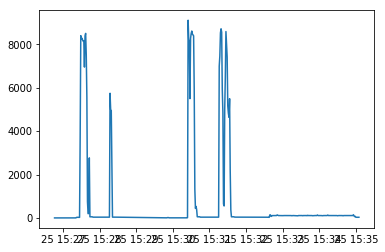

In [66]:
plt.plot(equip_data[6]['time'],equip_data[6]['P'])

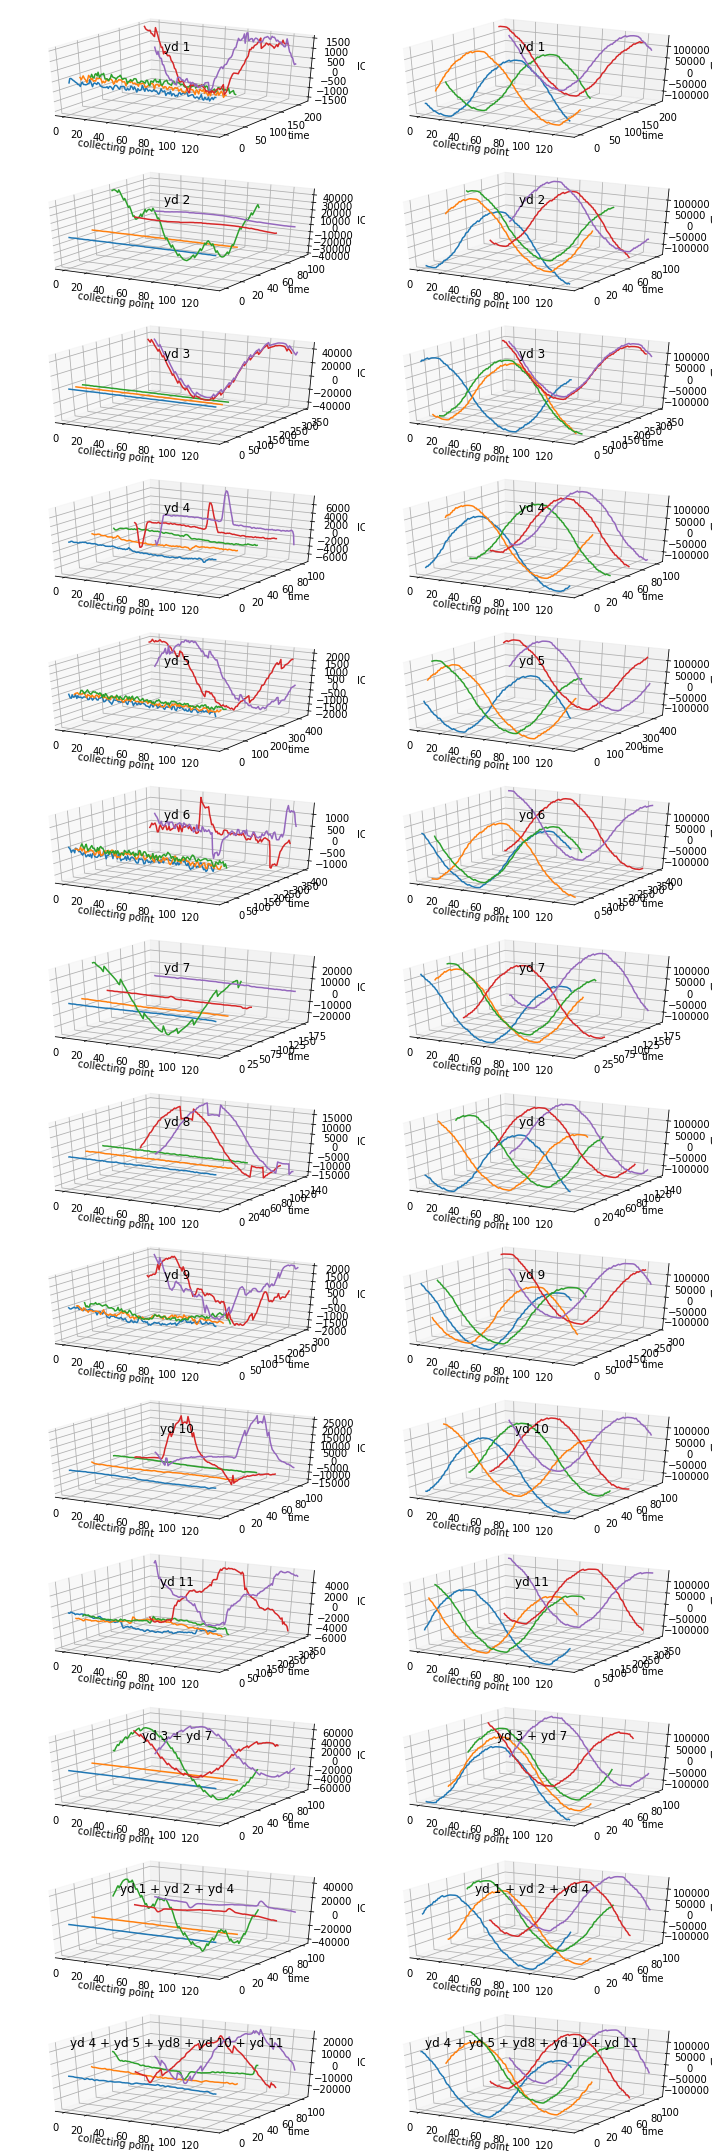

In [188]:
fig = plt.figure(figsize=(10, 30))
x=range(1,129)
num=1
times=[0,25,50,75,100]
for i in range(0,len(period_data)):
    for c in [1, 129]:
        ax = fig.add_subplot(len(period_data),2,num, projection='3d')
        num = num+1
        for time in times:
            tmp = period_data[i].iloc[time][c:c+128]
            for k in range(len(tmp)):
                if(tmp[k]>1000000):
                    tmp[k]=tmp[k]-1666665
            tm=(period_data[i]['time'][time]-period_data[i]['time'][0]).seconds*np.ones(len(x))
            ax.plot3D(x, tm, tmp);
            plt.xlabel('collecting point')
            plt.ylabel('time')
            if c==1:
                ax.set_zlabel('IC')
            else:
                ax.set_zlabel('UC')

            if i==11:
                plt.title('yd 3 + yd 7 ')
            elif i==12:
                plt.title('yd 1 + yd 2 + yd 4 ')
            elif i==13:
                plt.title('yd 4 + yd 5 + yd8 + yd 10 + yd 11 ')
            else:   
                plt.title('yd %d ' %(i+1))
plt.tight_layout()
plt.show()

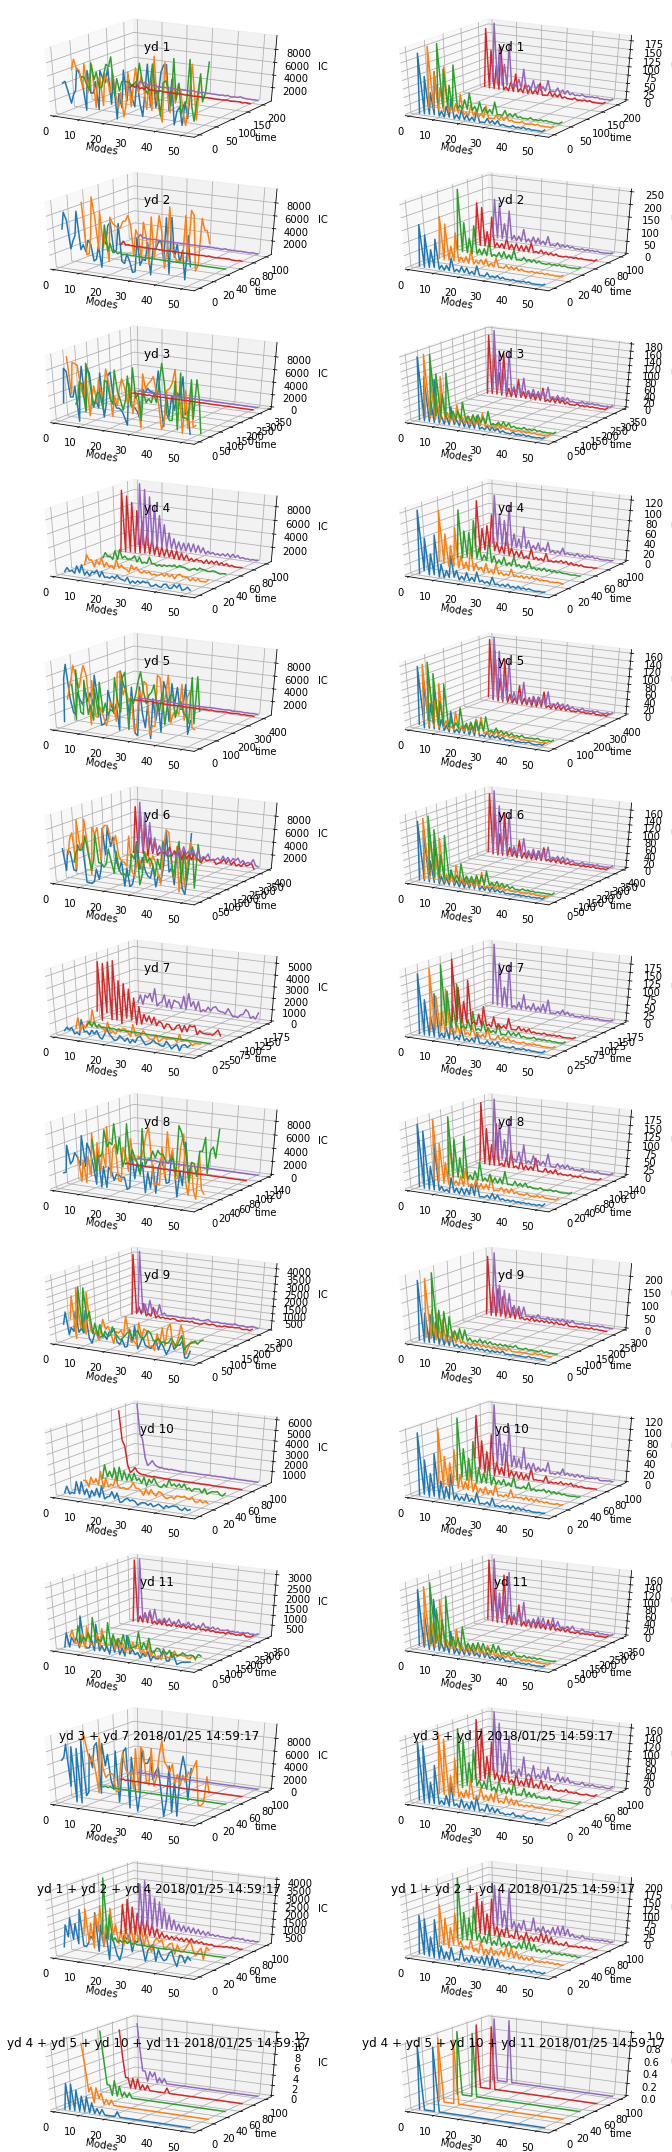

In [191]:
fig = plt.figure(figsize=(10, 30))
x=range(2,52)
num=1
times=[0,25,50,75,100]
for i in range(0,len(harmonic_data)):
    for c in [1, 51]:
        ax = fig.add_subplot(len(period_data),2,num, projection='3d')
        num = num+1
        for time in times:
            tmp = harmonic_data[i].iloc[time][c:c+50]
            tm=(period_data[i]['time'][time]-period_data[i]['time'][0]).seconds*np.ones(len(x))
            ax.plot3D(x, tm, tmp);
            plt.xlabel('Modes')
            plt.ylabel('time')
            if c==1:
                ax.set_zlabel('IC')
            else:
                ax.set_zlabel('UC')
            if i==11:
                plt.title('yd 3 + yd 7 '+s)
            elif i==12:
                plt.title('yd 1 + yd 2 + yd 4 '+s)
            elif i==13:
                plt.title('yd 4 + yd 5 + yd 10 + yd 11 '+s)
            else:   
                plt.title('yd %d ' %(i+1))
plt.tight_layout()
plt.show()

In [152]:
time

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [678, 678, 678, ..., 678, 678, 678],
       [679, 679, 679, ..., 679, 679, 679],
       [680, 680, 680, ..., 680, 680, 680]])

In [193]:
def test_mix_known(IC_list, equips):
    status_list = []
    mp_equip_IC=defaultdict(set)
    mp_equip_status=defaultdict(set)
    for equip in equips:
        for it in map_IC:
            for st in map_IC[it]:
                if(st.startswith(equip)):
                    mp_equip_IC[it].add(st)
                    mp_equip_status[st].add(it)
    ##return mp_equip_IC
                
    status_list = []
    if equip == 'YD2':
        while ic < len(IC_list):
            if IC_list[ic]<20:
                status_list.append('YD2 关闭')
                ic+=1
            elif 5000<IC_list[ic]<6000:
                start=ic
                ic+=1
                while ic < len(IC_list) and 5000<IC_list[ic]<6000:
                    ic+=1
                if 2<=ic-start<=5:
                    status_list.append('YD2 低火')
                elif 7<=ic-start<=11:
                    status_list.append('YD2 中低火')
                elif 13<=ic-start<=17:
                    status_list.append('YD2 中火')
                elif 20<=ic-start<=25:
                    status_list.append('YD2 中高火')
                elif ic-start>25:
                    status_list.append('YD2 高火')
            else:
                ic+=1
    else:
        pre_ic=IC_list[0]
        for ic in IC_list:
            if abs(ic-pre_ic)>20:
                pre_ic=ic
                continue
            pre_ic=ic
            tmp = mp_equip_IC.get(ic, mp_equip_IC[min(mp_equip_IC.keys(), key=lambda k: abs(k-ic))])
            value = min(mp_equip_IC.keys(), key=lambda k: abs(k-ic))
            pre = 10000000.0
            if len(status_list) > 0:
                for ic1 in mp_equip_status[str(status_list[-1])]:
                    pre = min(pre, abs(ic1-ic))
            if value < pre/1000:
                status_list.append(tmp)
            else:
                status_list.append(status_list[-1])
        
    for st in range(0, len(status_list)):
        if st>1 and st < len(status_list)-1 and status_list[st]!= status_list[st-1] and status_list[st]!= status_list[st+1]:
            status_list[st] = status_list [st-1]
            
    res = list()
    res.append(status_list[0])
    for st in range(1, len(status_list)):
        if status_list[st]!= status_list[st-1]:
            res.append(status_list[st])
    return res

In [194]:
test_mix_known(equip_data28['IC'].tolist(), equips=['YD2','YD8'])

[{'YD2 关闭', 'YD8 保温', 'YD8 关闭'},
 {'YD8 加热、制冷'},
 {'YD2 低火'},
 {'YD8 加热、制冷'},
 {'YD2 低火'},
 {'YD8 加热、制冷'},
 {'YD2 低火'},
 {'YD8 加热、制冷'},
 {'YD2 低火'},
 {'YD8 加热、制冷'},
 {'YD2 低火'},
 {'YD8 加热、制冷'},
 {'YD2 低火'},
 {'YD8 加热、制冷'},
 {'YD2 低火'},
 {'YD8 加热、制冷'},
 {'YD2 低火'},
 {'YD8 加热、制冷'},
 {'YD2 低火'},
 {'YD8 加热、制冷'},
 {'YD2 低火'},
 {'YD8 加热、制冷'},
 {'YD2 低火'},
 {'YD8 加热、制冷'},
 {'YD2 低火'},
 {'YD2 中高火'},
 {'YD2 中火'},
 {'YD2 中低火'},
 {'YD2 中火'},
 {'YD2 中高火'},
 {'YD2 中火'},
 {'YD2 中高火'},
 {'YD2 中火'},
 {'YD2 中高火'},
 {'YD2 中火'},
 {'YD2 中高火'},
 {'YD2 低火'},
 {'YD8 加热、制冷'},
 {'YD2 低火'},
 {'YD8 加热、制冷'},
 {'YD2 低火'},
 {'YD8 加热、制冷'},
 {'YD2 低火'},
 {'YD2 高火'},
 {'YD8 制冷'},
 {'YD2 关闭', 'YD8 保温', 'YD8 关闭'}]

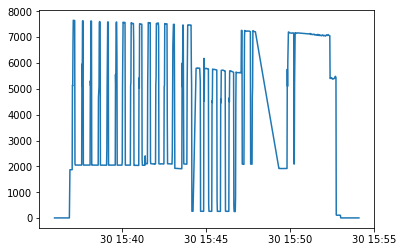

In [195]:
plt.plot(equip_data28['time'], equip_data28['IC'])